In [1]:
# Imports
%matplotlib inline
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") 
import numpy as np
import scipy.stats as stats
import io
import requests
import warnings
warnings.filterwarnings('ignore')

# Load data
url="https://ndownloader.figshare.com/files/11003276"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))


# Color Scheme
KIT_COLORS = ["#009682", "#4664aa", "#a3107c", "#df9b1b", "#fce500", "#8cb63c","#a22223", "#a7822e", "#23a1e0" ]

# X Axis Order
x_order =["empty", "<r,r,r>", "<r,r,v>", "<r,v,r>", "<r,v,v>", "<v,r,r>", "<v,r,v>", "<v,v,r>", "<v,v,v>"] 

# RC Params
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 12)

# Figure 1: Sample Properties

## (a) Sample sizes

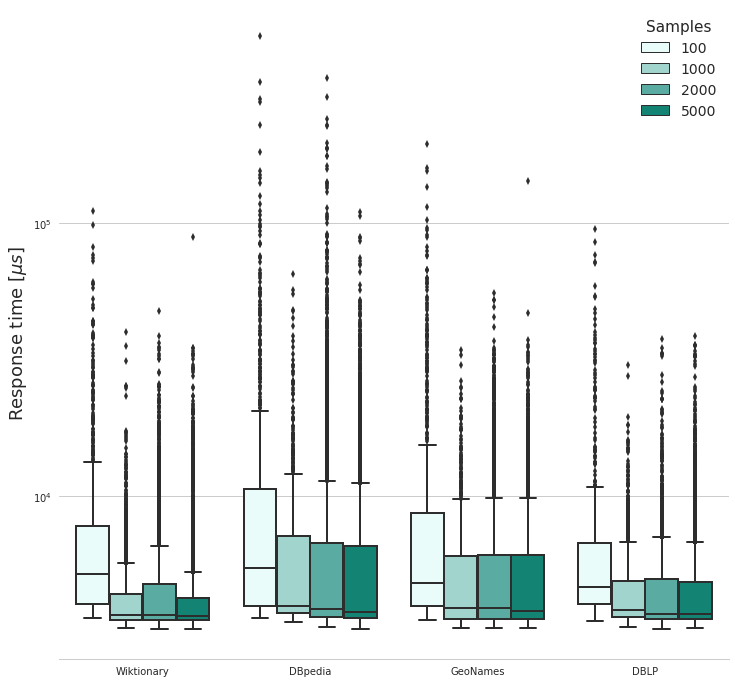

In [2]:
df_f1 = df[df['Studyname'] == "samplesize"]
vplot = sns.boxplot(x="Source", y="ms", hue='Samples', data=df_f1, color=KIT_COLORS[0])
vplot.set_yscale("log")
vplot.set_ylabel("Response time [$\mu s$]")
vplot.set_xlabel("")
sns.despine(left=True)
sns.set(font_scale=1)
sns.set_style("whitegrid") 

## (b) Sample cardinalities

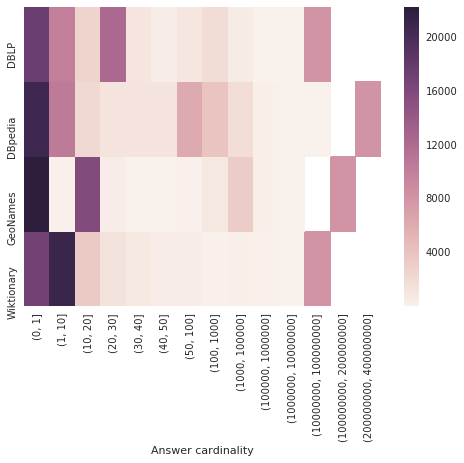

In [3]:
df_f1['bin'] = pd.cut(df_f1['total_items'], bins=[0,1, 10, 20, 30, 40, 50 ,100, 1000, 100000, 1000000, 10000000, 100000000, 200000000, 400000000])
total_items_count = pd.pivot_table(df_f1, columns=['bin'], index=['Source'], values='total_items', aggfunc='count' )
hm = sns.heatmap(total_items_count)
plt.ylabel("")
plt.xlabel("Answer cardinality")

# Figure 3: Boxplot pattern types

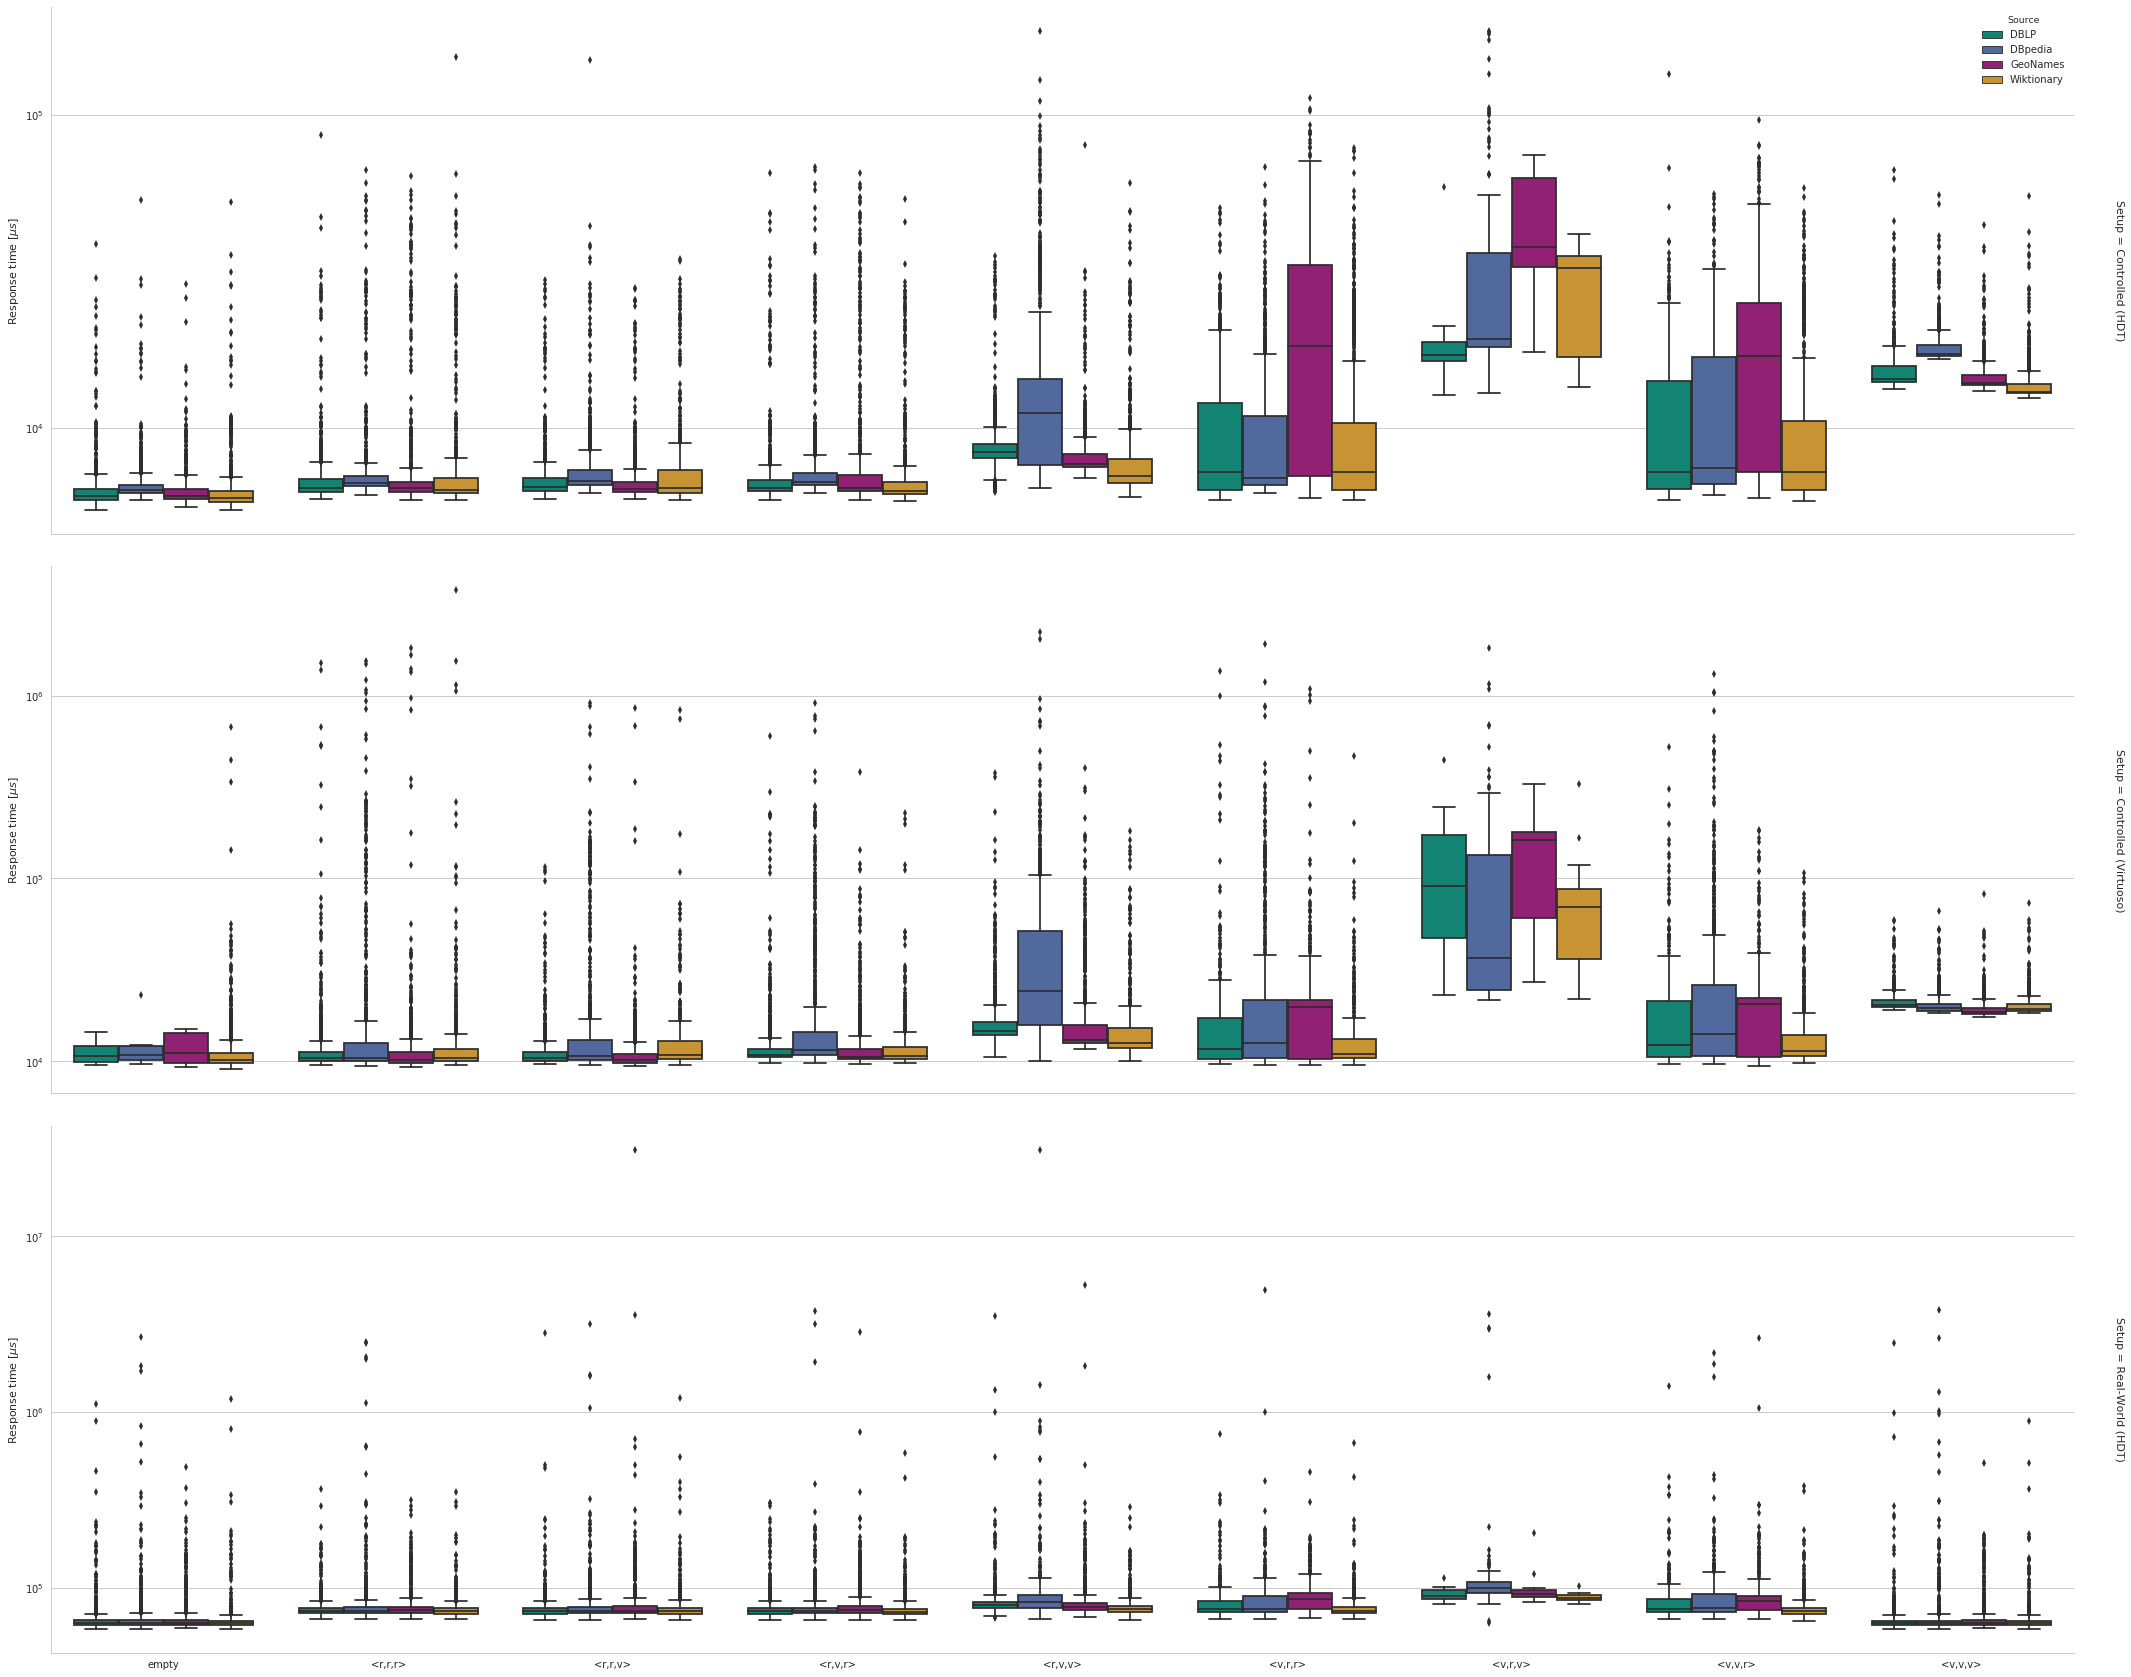

In [4]:
df_f2 = df[(df['Studyname'] == "pagesize") &(df['Pagesize'] == 100)]
fp = sns.factorplot(x="category", y="ms", hue="Source",  row="Setup", data=df_f2, kind="box",  
                size=8, aspect=3.7, palette=KIT_COLORS, legend_out=False, margin_titles=True, sharey=False, order=x_order,
                   row_order=["Controlled (HDT)", "Controlled (Virtuoso)", "Real-World (HDT)"],
                   hue_order=['DBLP', 'DBpedia', 'GeoNames', 'Wiktionary'])
fp.set(xlabel='', ylabel="Response time [$\mu s$]")
sns.set(font_scale=2.5) 
fp.fig.get_axes()[0].set_yscale('log')
fp.fig.get_axes()[1].set_yscale('log')
fp.fig.get_axes()[2].set_yscale('log')
plt.tight_layout()
sns.set_style("whitegrid")

# Figure 4: Resonse time / answer cardinality scatter plot

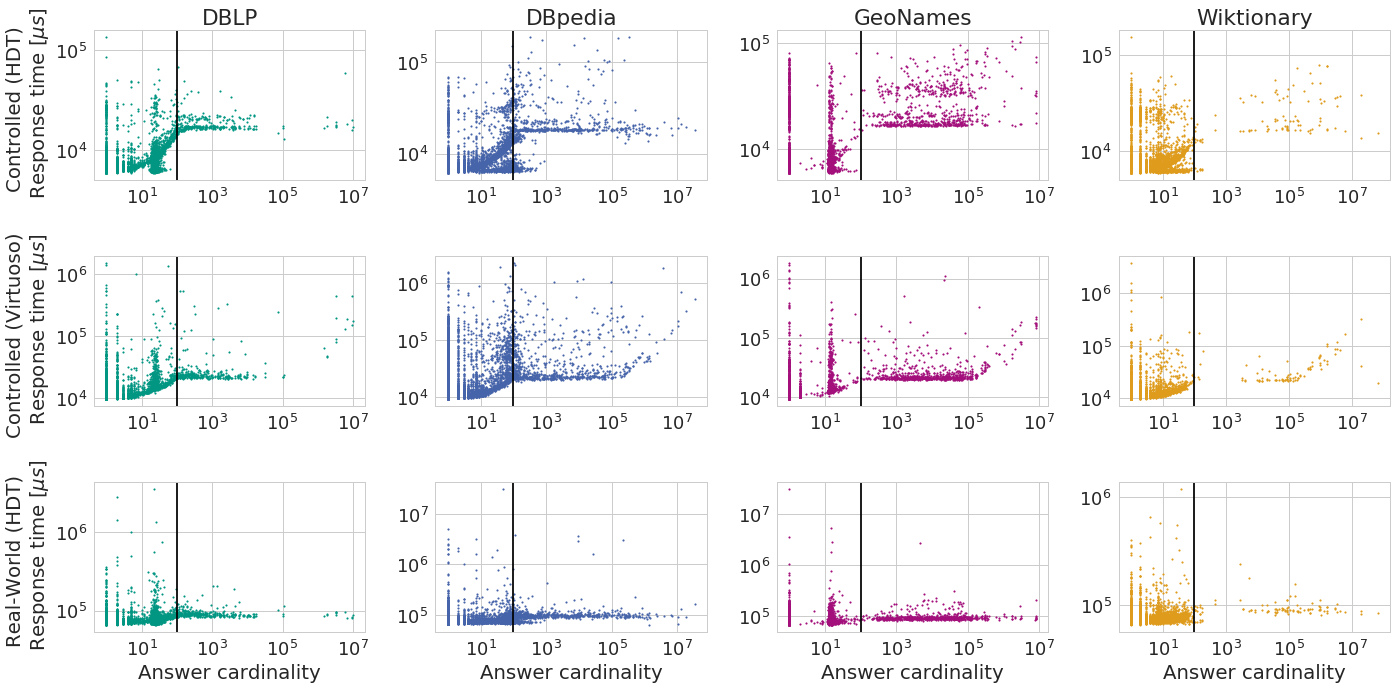

In [5]:
df_f4_c = df[(df['Studyname'] == "pagesize") & (df['Environment'] == "Controlled") & (df['category'] != "<v,v,v>") & (df['category'] != "empty")] 
df_f4_r = df[(df['Studyname'] == "pagesize") & (df['Environment'] == "Real-World") & (df['category'] != "<v,v,v>") & (df['category'] != "empty")] 
sns.set(font_scale=1.8)
sns.set_style('whitegrid')
fig, ax  = plt.subplots(3, 4, sharey=False, figsize=(20,10))
sources = sorted(list(df_f4_c['Source'].unique()))
sources.extend(sources)
sources.extend(sources)
colrs = KIT_COLORS[:4]
colrs.extend(colrs)
colrs.extend(colrs)
cors = []
for server, color, i in zip(sources, colrs, range(12)):
    k = int(i % 4)
    j = int(i / 4)
    sax = ax[j][k]
    if i < 4:
        a = df_f4_c[(df_f4_c['Source'] == server) & (df_f4_c['Backend'] == "HDT") & (df['Pagesize'] == 100)]
        sax.set_title(server) #, fontsize=12)
    elif i < 8:
        a = df_f4_c[(df_f4_c['Source'] == server) & (df_f4_c['Backend'] == "Virtuoso") & (df['Pagesize'] == 100)]
    else:
        a = df_f4_r[(df_f4_r['Source'] == server)]
    if i == 0:
        env = "Controlled (HDT)"
        sax.set_ylabel("{0} \n Response time [$\mu s$]".format(env)) #, fontsize=12)
    if i == 4:
        env = "Controlled (Virtuoso)"
        sax.set_ylabel("{0} \n Response time [$\mu s$]".format(env)) #, fontsize=12)
    if i == 8:
        env = "Real-World (HDT)"
        sax.set_ylabel("{0} \n Response time [$\mu s$]".format(env)) #, fontsize=12)
    sax.scatter(a['total_items'], a['ms'], c = color, label=server, s=3)
    if i >= 8:
        sax.set_xlabel("Answer cardinality") #, fontsize=12)
    sax.set_yscale('log')
    sax.set_xscale('log')
    sax.axvline(100, c='#000000')
plt.tight_layout() 

## Additional Figure: Answer Cardinality/ Pagesize for HDT Backend

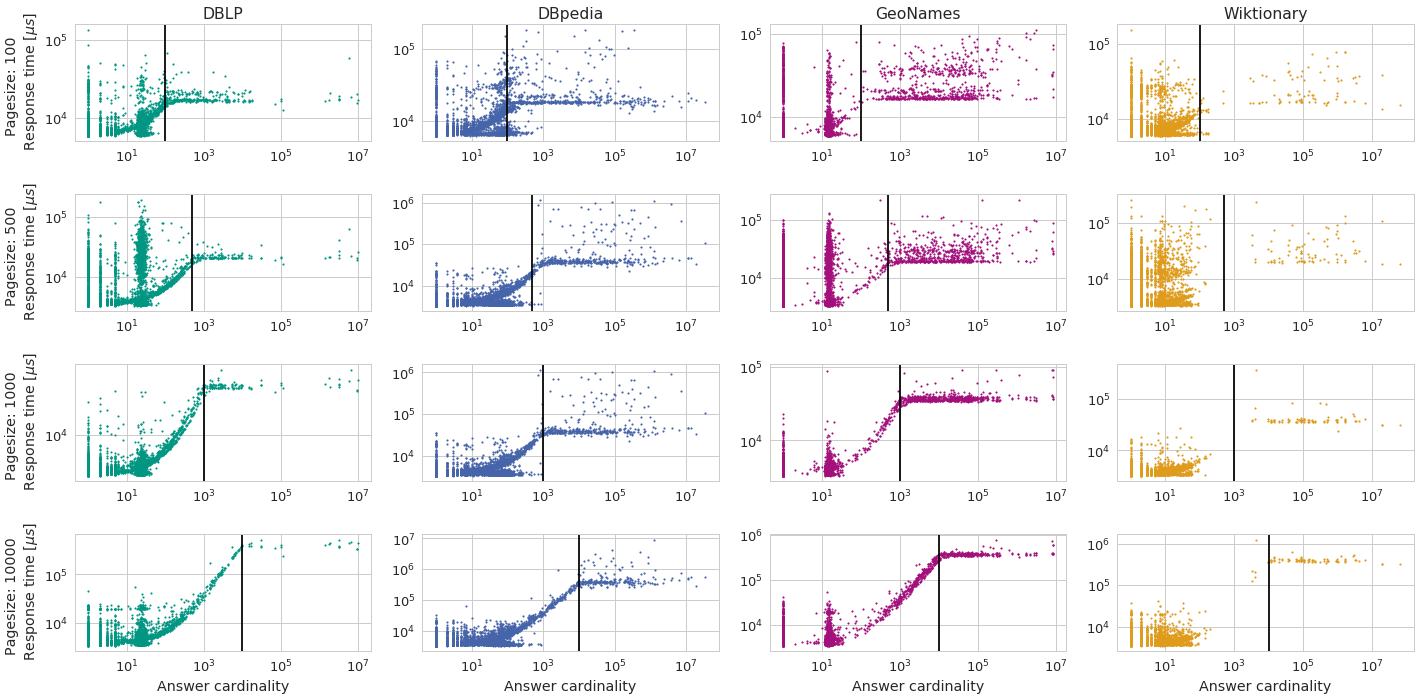

In [6]:
matplotlib.rcParams['figure.figsize'] = (16, 8)
sns.set(font_scale=1.3)
sns.set_style('whitegrid')
fig, ax  = plt.subplots(4, 4, sharey=False, figsize=(20,10))
sources = sorted(list(df_f4_c['Source'].unique()))
sources.extend(sources)
sources.extend(sources)
sources.extend(sources)
colrs = KIT_COLORS[:4]
colrs.extend(colrs)
colrs.extend(colrs)
colrs.extend(colrs)
cors_hdt = []
for server, color, i in zip(sources, colrs, range(16)):
    k = int(i % 4)
    j = int(i / 4)
    sax = ax[j][k]
    #print(server)
    if i < 4:
        a = df_f4_c[(df_f4_c['Source'] == server) & (df_f4_c['Backend'] == "HDT") & (df['Pagesize'] == 100)]
        sax.set_title(server) #, fontsize=12)
    elif i < 8:
        a = df_f4_c[(df_f4_c['Source'] == server) & (df_f4_c['Backend'] == "HDT") & (df['Pagesize'] == 500)]
    elif i < 12:
        a = df_f4_c[(df_f4_c['Source'] == server) & (df_f4_c['Backend'] == "HDT") & (df['Pagesize'] == 1000)]
    else:
        a = df_f4_c[(df_f4_c['Source'] == server) & (df_f4_c['Backend'] == "HDT") & (df['Pagesize'] == 10000)]
    if i == 0:
        env = "Pagesize: 100"
        backend = "HDT"
        pagesize = 100
        sax.set_ylabel("{0} \n Response time [$\mu s$]".format(env)) #, fontsize=12)
    if i == 4:
        env = "Pagesize: 500"
        backend = "HDT"
        pagesize = 500
        sax.set_ylabel("{0} \n Response time [$\mu s$]".format(env)) #, fontsize=12)
    if i == 8:
        env = "Pagesize: 1000"
        backend = "HDT"
        pagesize = 1000
        sax.set_ylabel("{0} \n Response time [$\mu s$]".format(env)) #, fontsize=12)
    if i == 12:
        pagesize = 10000
        env = "Pagesize: 10000"
        backend = "HDT"
        sax.set_ylabel("{0} \n Response time [$\mu s$]".format(env)) #, fontsize=12)
    sax.scatter(a['total_items'], a['ms'], c = color, label=server, s=3)
    if i >= 12:
        sax.set_xlabel("Answer cardinality") #, fontsize=12)
    sax.set_yscale('log')
    sax.set_xscale('log')
    sax.axvline(pagesize, c='#000000')
plt.tight_layout()

## Additional Figure: Answer Cardinality/ Pagesize for Virtuoso Backend

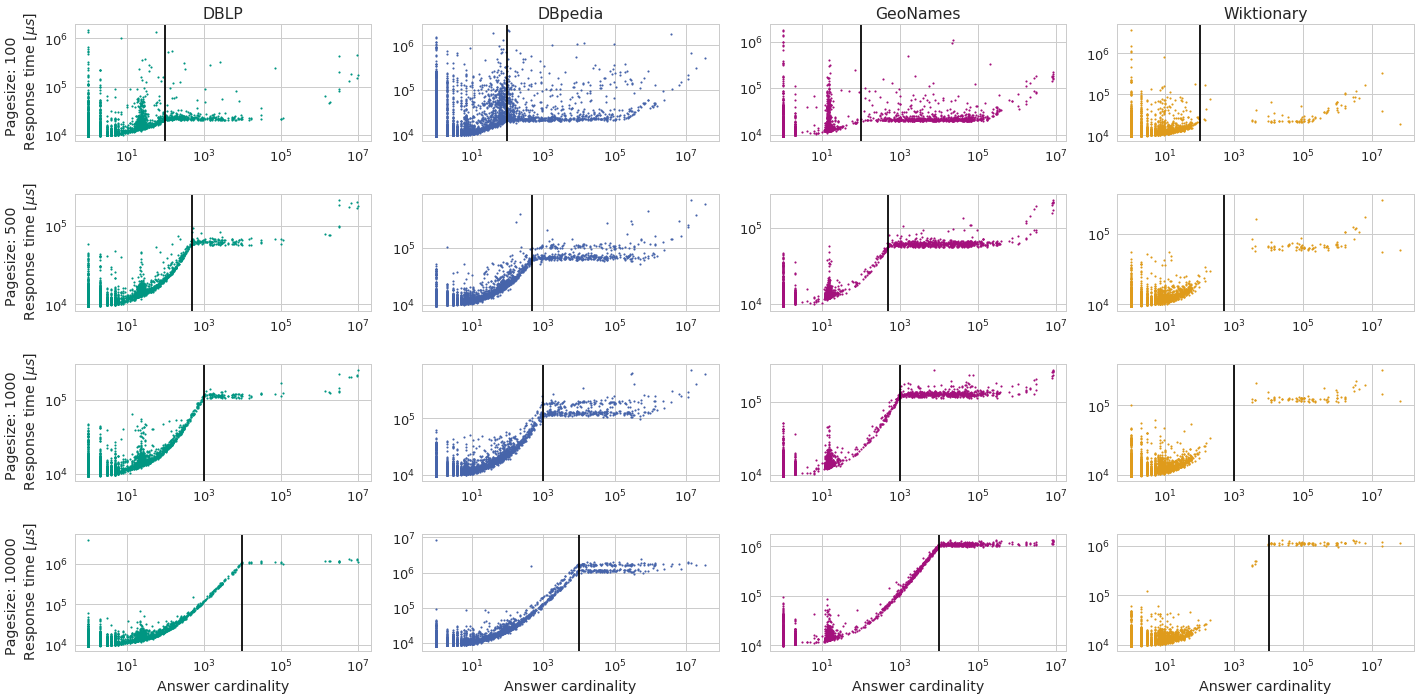

In [7]:
matplotlib.rcParams['figure.figsize'] = (16, 8)
sns.set(font_scale=1.3)
sns.set_style('whitegrid')
fig, ax  = plt.subplots(4, 4, sharey=False, figsize=(20,10))
sources = sorted(list(df_f4_c['Source'].unique()))
sources.extend(sources)
sources.extend(sources)
sources.extend(sources)
colrs = KIT_COLORS[:4]
colrs.extend(colrs)
colrs.extend(colrs)
colrs.extend(colrs)
cors_hdt = []
for server, color, i in zip(sources, colrs, range(16)):
    k = int(i % 4)
    j = int(i / 4)
    sax = ax[j][k]
    #print(server)
    if i < 4:
        a = df_f4_c[(df_f4_c['Source'] == server) & (df_f4_c['Backend'] == "Virtuoso") & (df['Pagesize'] == 100)]
        sax.set_title(server) #, fontsize=12)
    elif i < 8:
        a = df_f4_c[(df_f4_c['Source'] == server) & (df_f4_c['Backend'] == "Virtuoso") & (df['Pagesize'] == 500)]
    elif i < 12:
        a = df_f4_c[(df_f4_c['Source'] == server) & (df_f4_c['Backend'] == "Virtuoso") & (df['Pagesize'] == 1000)]
    else:
        a = df_f4_c[(df_f4_c['Source'] == server) & (df_f4_c['Backend'] == "Virtuoso") & (df['Pagesize'] == 10000)]
    if i == 0:
        env = "Pagesize: 100"
        backend = "HDT"
        pagesize = 100
        sax.set_ylabel("{0} \n Response time [$\mu s$]".format(env)) #, fontsize=12)
    if i == 4:
        env = "Pagesize: 500"
        backend = "HDT"
        pagesize = 500
        sax.set_ylabel("{0} \n Response time [$\mu s$]".format(env)) #, fontsize=12)
    if i == 8:
        env = "Pagesize: 1000"
        backend = "HDT"
        pagesize = 1000
        sax.set_ylabel("{0} \n Response time [$\mu s$]".format(env)) #, fontsize=12)
    if i == 12:
        pagesize = 10000
        env = "Pagesize: 10000"
        backend = "HDT"
        sax.set_ylabel("{0} \n Response time [$\mu s$]".format(env)) #, fontsize=12)
    sax.scatter(a['total_items'], a['ms'], c = color, label=server, s=3)
    if i >= 12:
        sax.set_xlabel("Answer cardinality") #, fontsize=12)
    sax.set_yscale('log')
    sax.set_xscale('log')
    sax.axvline(pagesize, c='#000000')
plt.tight_layout()

# Figure 5: Throughput 

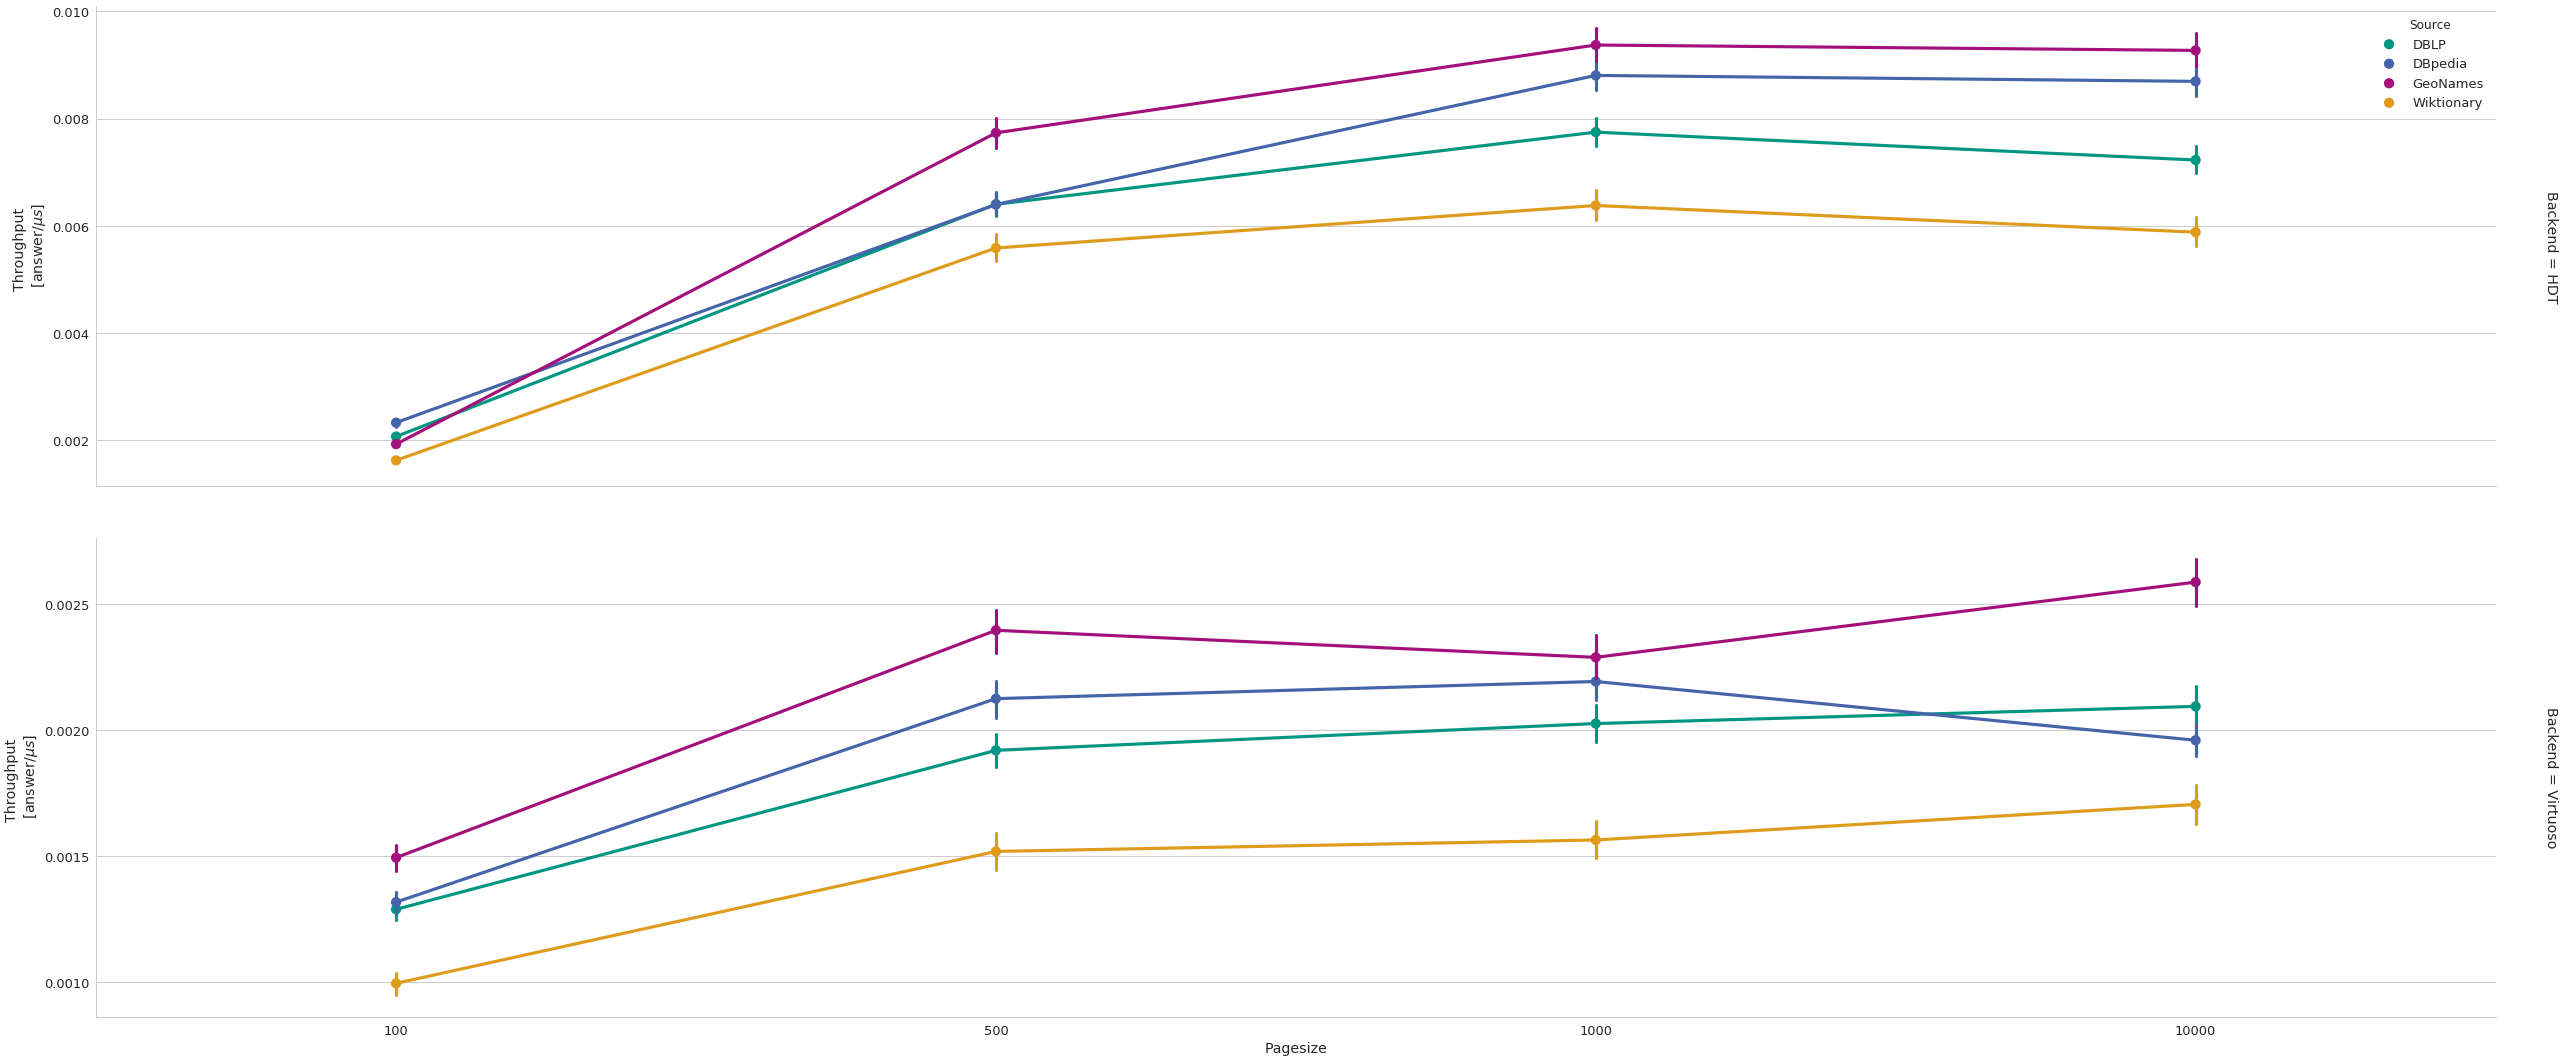

In [8]:
df_f5 = df[(df['Studyname'] == "pagesize") & (df['Environment'] == "Controlled")]
fp = sns.factorplot(x="Pagesize", y="throughput", hue="Source",  row="Backend", data=df_f5, kind="point",  
                size=8, aspect=4.5, palette=KIT_COLORS, legend_out=False, margin_titles=True, sharey=False,
                   x_order=[100, 500, 1000,10000],
                   hue_order=['DBLP', 'DBpedia', 'GeoNames', 'Wiktionary'])
fp.set(xlabel='', ylabel="Throughput \n [answer/$\mu s$]")
sns.set(font_scale=4) 
plt.xlabel("Pagesize")
plt.tight_layout()
sns.set_style("whitegrid")

# Figure 6: Paginating

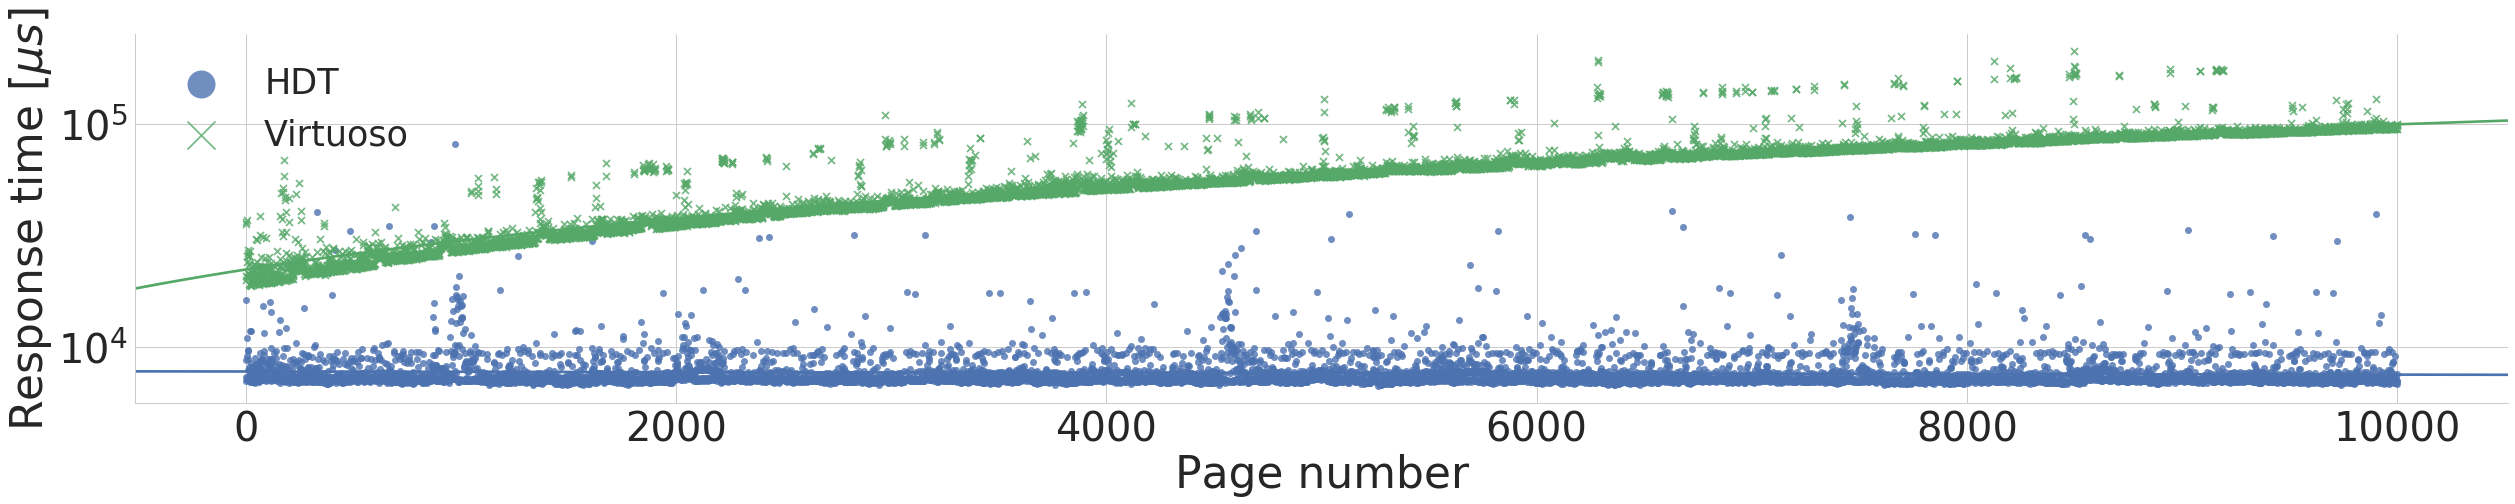

In [9]:
df_f6 = df[df['Studyname'] == "paginating"]
lp = sns.lmplot(x="page", y="ms", hue="Backend", data=df_f6, size=8, aspect=4.5, markers=["o", "x"],legend=False)
lp.set(xlabel='Page number', ylabel="Response time [$\mu s$]")
sns.set(font_scale=3.5) 
lp.fig.get_axes()[0].set_yscale('log')
plt.tight_layout()
plt.legend(loc='upper left',markerscale=4.)
sns.set_style("whitegrid")

# Figure 7: KG / TPF instance relation 

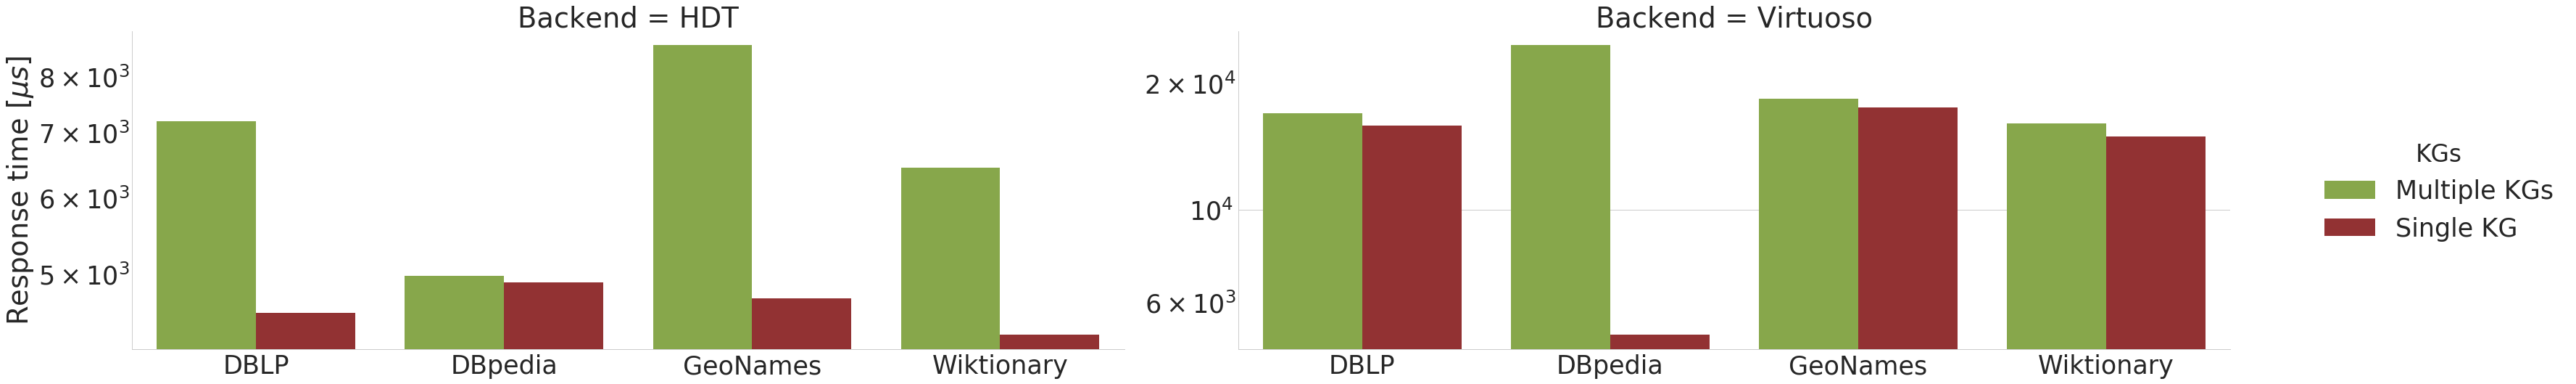

In [10]:
df_f7 = df[df['Studyname']== "all_loaded"]
fp3 = sns.factorplot(x="Source", y="ms", hue="KGs", data=df_f7, kind="bar", ci=None,
                size=9, aspect=2.5, palette=KIT_COLORS[5:], sharey=False,
                    col='Backend', margin_titles=True, legend_out=True,
                    x_order=['DBLP', 'DBpedia', 'GeoNames', 'Wiktionary'])
sns.set(font_scale=4)
fp3.fig.get_axes()[0].set_ylabel("Response time [$\mu s$]")
fp3.fig.get_axes()[0].set_xlabel("")
fp3.fig.get_axes()[0].set_yscale('log')
fp3.fig.get_axes()[1].set_yscale('log')
fp3.fig.get_axes()[1].set_xlabel("")
sns.set_style('whitegrid')